# What is the Half-Life of a HGNC Gene Symbol?

**Author:** [Charles Tapley Hoyt](https://github.com/cthoyt)

**Estimated Run Time:** 10 seconds

Here's an interesting question from [John Bachman](https://github.com/johnbachman): what's the half-life of a gene symbol?

In [1]:
import datetime
import getpass
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import bio2bel_hgnc
from bio2bel_hgnc.models import HumanGene

In [2]:
%matplotlib inline

In [3]:
print(sys.version)

3.7.3 (default, Mar 27 2019, 09:23:39) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [4]:
print(time.asctime())

Mon Aug 12 12:03:41 2019


In [5]:
print(getpass.getuser())

cthoyt


In [6]:
m = bio2bel_hgnc.Manager()
m

<HgncManager url=sqlite:////Users/cthoyt/.bio2bel/bio2bel.db>

In [7]:
# calculate 5 years ago
t = datetime.datetime.now() - datetime.timedelta(days=365 * 5)
t

datetime.datetime(2014, 8, 13, 12, 3, 42, 7926)

Number of genes never modified

In [8]:
m.session.query(HumanGene).filter(HumanGene.date_symbol_changed.is_(None)).count()

33603

Number of genes modified before 5 years ago

In [9]:
m.session.query(HumanGene).filter(HumanGene.date_symbol_changed < t).count()

7926

In [10]:
gene = m.session.query(HumanGene).filter(HumanGene.date_symbol_changed < t).first()

for k, v in gene.to_dict().items():
    if v is None:
        continue
    print('{}: {}'.format(k, v))

date_name_changed: 2012-08-15
name: A1BG antisense RNA 1
entrez: 503538
date_modified: 2013-06-27
location: 19q13.43
symbol: A1BG-AS1
date_symbol_changed: 2010-11-25
identifier: 37133
date_approved_reserved: 2009-07-20
status: Approved
ucsc: uc002qse.3
ensembl_gene: ENSG00000268895
uuid: 493c3ebd-8d78-49ef-b1aa-c3ba568a72e3
vega: OTTHUMG00000183508
locus_group: non-coding RNA
locus_type: RNA, long non-coding
locationsortable: 19q13.43


Number of genes modified in the last 5 years

In [11]:
m.session.query(HumanGene).filter(HumanGene.date_symbol_changed > t).count()

1641

In [12]:
gene = m.session.query(HumanGene).filter(HumanGene.date_symbol_changed > t).first()

for k, v in gene.to_dict().items():
    if v is None:
        continue
    print('{}: {}'.format(k, v))

date_name_changed: 2019-07-15
name: alanyl-tRNA synthetase 1
entrez: 16
date_modified: 2019-08-10
location: 16q22.1
symbol: AARS1
date_symbol_changed: 2019-07-15
identifier: 20
date_approved_reserved: 1995-07-11
status: Approved
ucsc: uc002eyn.2
ensembl_gene: ENSG00000090861
uuid: a5340f2d-e32d-4946-8973-aa5e3b940d51
orphanet: 232194
vega: OTTHUMG00000177042
locus_group: protein-coding gene
locus_type: gene with protein product
locationsortable: 16q22.1


Histogram over frequency per year

In [13]:
years = [
    int(date.year)
    for date, in m.session.query(HumanGene.date_symbol_changed)
    if date is not None
]
print(f'Number of years to plot: {len(years)}')

Number of years to plot: 9567


In [14]:
year_range = max(years) - min(years)
year_range

18

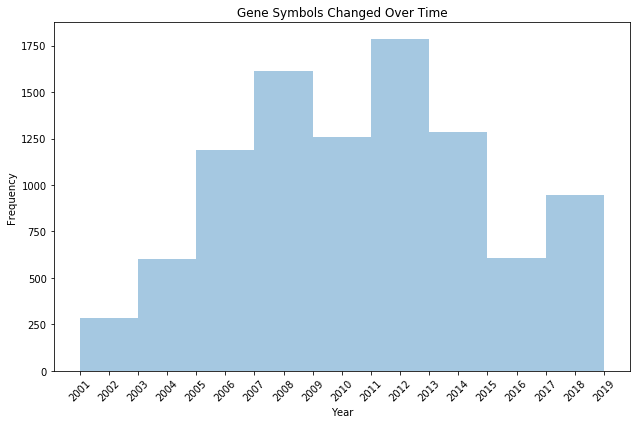

In [15]:
fix, ax = plt.subplots(1, 1, figsize=(9, 6))

sns.distplot(years, kde=False, bins=year_range // 2, ax=ax)
plt.xticks(list(range(min(years), max(years) + 1)), rotation=45)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Gene Symbols Changed Over Time')
plt.tight_layout()
plt.show()